In [1]:
#Bütikofer Kevin, Charles-Lewis Jaggi

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
textfile = open('ex1-data-train.csv')
data = []
for line in textfile:
    row_data = line.strip("\n").split(",")
    for i, item in enumerate(row_data):
        try:
            row_data[i] = float(item)
        except ValueError:
            pass
    data.append(row_data)
data = np.array(data)

In [3]:
textfile = open('ex1-data-test.csv')
data_test = []
for line in textfile:
    row_data = line.strip("\n").split(",")
    for i, item in enumerate(row_data):
        try:
            row_data[i] = float(item)
        except ValueError:
            pass
    data_test.append(row_data)
data_test = np.array(data_test)

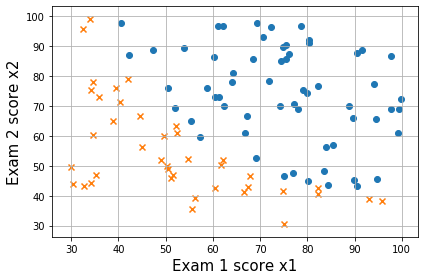

In [4]:
fig, ax = plt.subplots()
passed = np.array([i for i in data if i[2] == 1])
failed = np.array([i for i in data if i[2] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='o')
ax.scatter(failed[:,0], failed[:,1], marker='x')

ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

In [5]:
d = data_test[:,[0,1]]

In [100]:
def likelihoodHist(x, histValues, edgeValues):
    bin_idx = 0
    if x <edgeValues[0] or x >edgeValues[-1]:
        return 0
    for i in range(len(edgeValues)):
        if x < edgeValues[i]:
            bin_idx = i-1
            break
    return histValues[bin_idx] / np.sum(histValues)
    

0.4
0
[40.45755098 48.93902339 57.42049579 65.90196819 74.38344059 82.86491299
 91.3463854  99.8278578 ]
[ 5. 16.  6.  5.  6.  0.  2.]


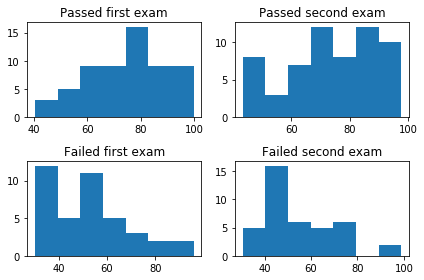

70.0
73.0
88.0


In [104]:
Pc1 = np.count_nonzero(data[:,2]) / len(data)
Pc0 = 1 - Pc1
print(Pc0)
    
fig, ax = plt.subplots()
passed = np.array([i for i in data if i[2] == 1])
failed = np.array([i for i in data if i[2] == 0])

plt.subplot(2, 2, 1)
plt.title("Passed first exam")
#Passed first exam
hist_x1_p, bins_x1_p, patches = plt.hist(passed[:, 0], bins='auto')
plt.subplot(2, 2, 2)
#passed second exam
plt.title("Passed second exam")
hist_x2_p, bins_x2_p, patches = plt.hist(passed[:, 1], bins='auto')
plt.subplot(2, 2, 3)
#failed first exam
plt.title("Failed first exam")
hist_x1_f, bins_x1_f, patches = plt.hist(failed[:, 0], bins='auto')
plt.subplot(2, 2, 4)
#failed first exam
plt.title("Failed second exam")
hist_x2_f, bins_x2_f, patches = plt.hist(failed[:, 1], bins='auto')

print(likelihoodHist(1212, hist_x1_p, bins_x1_p))
print(bins_x1_p)
print(hist_x2_f)


ax.grid(True)
fig.tight_layout()

plt.show()

y_pred = []
for row in d:
    p = likelihoodHist(row[0], hist_x1_p, bins_x1_p) * Pc1
    f = likelihoodHist(row[0], hist_x1_f, bins_x1_f) * Pc0
    y_pred.append(1 if p > f else 0)   
score = np.sum(y_pred == data_test[:,2]) / len(y_pred) * 100
print(score)

y_pred = []
for row in d:
    p = likelihoodHist(row[1], hist_x2_p, bins_x2_p) * Pc1
    f = likelihoodHist(row[1], hist_x2_f, bins_x2_f) * Pc0
    y_pred.append(1 if p > f else 0)   
score = np.sum(y_pred == data_test[:,2]) / len(y_pred) * 100
print(score)

y_pred = []
for row in d:    
    p = likelihoodHist(row[0], hist_x1_p, bins_x1_p) * likelihoodHist(row[1], hist_x2_p, bins_x2_p) * Pc1
    f = likelihoodHist(row[0], hist_x1_f, bins_x1_f) * likelihoodHist(row[1], hist_x2_f, bins_x2_f) * Pc0
    
    y_pred.append(1 if p > f else 0) 

score = np.sum(y_pred == data_test[:,2]) / len(y_pred) * 100


print(score)

In [113]:
def likelihood_univarianteGausian(x,mean,var):
    return (1/((2*np.pi*var)**(1/2))) * np.exp(-(1/(2*var))*(x-mean)**2)
    
mean_x1_passed = np.mean(passed[:, 0])
var_x1_passed = np.var(passed[:, 0])

mean_x1_failed = np.mean(failed[:, 0])
var_x1_failed = np.var(failed[:, 0])

mean_x2_passed = np.mean(passed[:, 1])
var_x2_passed = np.var(passed[:, 1])

mean_x2_failed = np.mean(failed[:, 1])
var_x2_failed = np.var(failed[:, 1])

y_pred = []
for row in d:
    p = likelihood_univarianteGausian(row[0], mean_x1_passed, var_x1_passed) * Pc1
    f = likelihood_univarianteGausian(row[0], mean_x1_failed, var_x1_failed) * Pc0
    y_pred.append(1 if p > f else 0)   
score = np.sum(y_pred == data_test[:,2]) / len(y_pred) * 100
print(score)

y_pred = []
for row in d:
    p = likelihood_univarianteGausian(row[1], mean_x2_passed, var_x2_passed) * Pc1
    f = likelihood_univarianteGausian(row[1], mean_x2_failed, var_x2_failed) * Pc0
    y_pred.append(1 if p > f else 0)   
score = np.sum(y_pred == data_test[:,2]) / len(y_pred) * 100
print(score)

y_pred = []
for row in d:    
    p = likelihood_univarianteGausian(row[0], mean_x1_passed, var_x1_passed) * likelihood_univarianteGausian(row[1], mean_x2_passed, var_x2_passed) * Pc1
    f = likelihood_univarianteGausian(row[0], mean_x1_failed, var_x1_failed) * likelihood_univarianteGausian(row[1], mean_x2_failed, var_x2_failed) * Pc0
    
    y_pred.append(1 if p > f else 0) 

score = np.sum(y_pred == data_test[:,2]) / len(y_pred) * 100


print(score)

71.0
72.0
89.0
